In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json

In [2]:
# Initial dataframe, add A501 sequence feature
overall_list = []
for i in range(1,303):
    f_A501_seq = open("A501/A501_seq/A501_%.3d.fasta"%i,"r")
    c_A501_seq = f_A501_seq.readlines()
    info_A501_seq = ["A501_%.3d"%i,c_A501_seq[0][1:-1],c_A501_seq[1][:-1]]
    overall_list.append(info_A501_seq)

overall_DF = pd.DataFrame(overall_list,columns=["A501_sequence_id","A501_sequence_name","A501_sequence"])

# Add A501 structure status
f_A501_result = open("A501/parser.log")
c_A501_result = f_A501_result.readlines()
info_A501_result = [item.split(' ')[1]=="Finished\n" for item in c_A501_result]
overall_DF["A501_structure_status"] = info_A501_result

# Add mapping between A501 and 3DAC
f_mapping = open("A501_3DAC_ortholog_modified.txt")
c_mapping = f_mapping.readlines()
info_mapping = [item.replace('\n','').split('\t') for item in c_mapping]
overall_DF["3DAC_sequence_name"] = None    # Initialize this column
for mapping in info_mapping:
    if int(overall_DF[overall_DF["A501_sequence_name"]==mapping[0]]["3DAC_sequence_name"].isnull()):
        overall_DF.loc[overall_DF["A501_sequence_name"]==mapping[0],"3DAC_sequence_name"] = mapping[1]
    else:
        append_DF = overall_DF.loc[overall_DF["A501_sequence_name"]==mapping[0]]
        append_DF["3DAC_sequence_name"] = mapping[1]
        overall_DF = overall_DF.append(append_DF,ignore_index=True)   # Split to two rows when have multi mapping

# Create 3DAC sequence feature dataframe, and merge
feature_3DAC_list = []
for i in range(1,303):
    f_3DAC_seq = open("3DAC/3DAC_seq/3DAC_%.3d.fasta"%i,"r")
    c_3DAC_seq = f_3DAC_seq.readlines()
    info_3DAC_seq = ["3DAC_%.3d"%i,c_3DAC_seq[0][1:-1],c_3DAC_seq[1][:-1]]
    feature_3DAC_list.append(info_3DAC_seq)

feature_3DAC_DF = pd.DataFrame(feature_3DAC_list,columns=["3DAC_sequence_id","3DAC_sequence_name","3DAC_sequence"])

overall_DF = overall_DF.merge(feature_3DAC_DF,how="left",on="3DAC_sequence_name")


# Create A501 structure prediction dataframe, and merge
structure_A501_list = []
for i in range(1,303):
    if overall_DF.loc[overall_DF["A501_sequence_id"]=="A501_%.3d"%i,"A501_structure_status"].all():
        f_json = open("A501/A501_summary/A501_%.3d/ranking_debug.json"%i,"r")
        json_dict = json.load(f_json)
        structure_A501_list.append(["A501_%.3d"%i,json_dict["plddts"]["model_1"],json_dict["plddts"]["model_2"]])
    else:
        structure_A501_list.append(["A501_%.3d"%i,0,0])
structure_A501_DF = pd.DataFrame(structure_A501_list,columns=["A501_sequence_id","A501_structure_model_1_score","A501_structure_model_2_score"])
overall_DF = overall_DF.merge(structure_A501_DF,how="left",on="A501_sequence_id")



# Add 3DAC structure status
f_3DAC_result = open("3DAC/parser.log")
c_3DAC_result = f_3DAC_result.readlines()
info_3DAC_result = [[item.split(' ')[0],item.split(' ')[1]=="Finished\n"] for item in c_3DAC_result]
info_3DAC_result_DF = pd.DataFrame(info_3DAC_result,columns=["3DAC_sequence_id","3DAC_structure_status"])
overall_DF = overall_DF.merge(info_3DAC_result_DF,how="left",on="3DAC_sequence_id")


# Create 3DAC structure prediction dataframe, and merge
structure_3DAC_list = []
for i in range(1,303):
    if overall_DF.loc[overall_DF["3DAC_sequence_id"]=="3DAC_%.3d"%i,"3DAC_structure_status"].all():
        f_json = open("3DAC/3DAC_summary/3DAC_%.3d/ranking_debug.json"%i,"r")
        json_dict = json.load(f_json)
        structure_3DAC_list.append(["3DAC_%.3d"%i,json_dict["plddts"]["model_1"],json_dict["plddts"]["model_2"]])
    else:
        structure_3DAC_list.append(["3DAC_%.3d"%i,0,0])
structure_3DAC_DF = pd.DataFrame(structure_3DAC_list,columns=["3DAC_sequence_id","3DAC_structure_model_1_score","3DAC_structure_model_2_score"])
overall_DF = overall_DF.merge(structure_3DAC_DF,how="left",on="3DAC_sequence_id")

# Save dataframe to csv
overall_DF.to_csv("overall_result.csv")
avaiable_DF = overall_DF[overall_DF[["A501_structure_status","3DAC_structure_status"]].all(axis=1)]


C:\Users\85404\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
overall_DF.head()

,A501_sequence_id,A501_sequence_name,A501_sequence,A501_structure_status,3DAC_sequence_name,3DAC_sequence_id,3DAC_sequence,A501_structure_model_1_score,A501_structure_model_2_score,3DAC_structure_status,3DAC_structure_model_1_score,3DAC_structure_model_2_score
0,A501_001,WP_011250482.1,MAKKGAGATRGISPVRPTRALPIGAYLKVADNSGAKVIQIIGVVGY...,True,Chromosome1_1050,3DAC_210,MVRPYSRLKIADNSGVKEIQVIRVIGNLQDDALNPNVKIWGTVGDI...,90.681015,90.474789,True,92.911375,92.915551
1,A501_002,WP_042692804.1,MGKSLIQQRRGKGTTTFRAPSHRYRGAVKYVPLNVVKEKTLRGVVE...,True,Chromosome1_1057,3DAC_211,MGIKKFKPTTPGRRHMTVLDFSEITKTEPEKSLVVTKKSTGGRNNQ...,94.120890,93.913161,True,95.125738,95.403985
2,A501_003,WP_042693005.1,MKVVRFGVSVPEELLEKFDRIIEEKGYVNRSEAIRDLMRDFIIRHE...,True,Chromosome1_210,3DAC_024,MRFTVSVDDEIGAFIDSLVKEYGYASRSELIRDLAREKKAELEVGD...,95.654313,95.708373,True,93.529059,93.964420
3,A501_004,WP_050001839.1,MDCTKDYCVKDLSLATSGEKKIDWVSRFMPVLQTIRREFEREKPFK...,True,Chromosome1_1121,3DAC_224,MAHVKDISLAPHGWKKINWVKAHMKVMPLVKKRLDEKGIFKGVRIG...,96.819289,96.925328,True,96.596944,96.796390
4,A501_005,WP_050001842.1,MRRDYTLYLFASLGSFLIAYIALPLVIIFAKQLMDWEMLVKTLHDP...,True,Chromosome1_359,3DAC_056,MLRFFATLLAFIILLPFLGLSIYTTPSELWHALTNPDVLDALKNSF...,95.500632,95.463742,True,93.608329,93.864206


In [4]:
# Counting structure failures
print(len(overall_DF[overall_DF[["A501_structure_status","3DAC_structure_status"]].all(axis=1)]))
print(len(overall_DF))
print(len(overall_DF[overall_DF["A501_structure_status"]]["A501_sequence_id"].value_counts()))
print(len(overall_DF["A501_sequence_id"].value_counts()))
print(len(overall_DF[overall_DF["3DAC_structure_status"]]["3DAC_sequence_id"].value_counts()))
print(len(overall_DF["3DAC_sequence_id"].value_counts()))



275
303
274
302
294
302


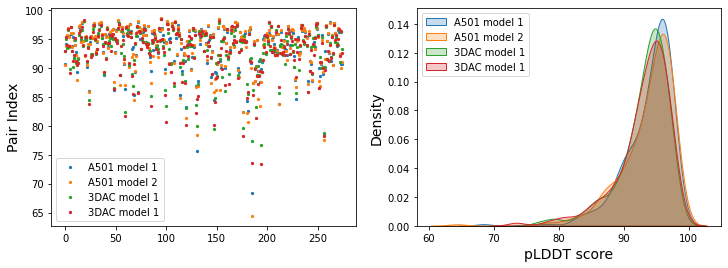

In [56]:
# Figure of Alphafold scores
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(np.arange(0,len(avaiable_DF)),avaiable_DF["A501_structure_model_1_score"],s=5,label="A501 model 1")
plt.scatter(np.arange(0,len(avaiable_DF)),avaiable_DF["A501_structure_model_2_score"],s=5,label="A501 model 2")
plt.scatter(np.arange(0,len(avaiable_DF)),avaiable_DF["3DAC_structure_model_1_score"],s=5,label="3DAC model 1")
plt.scatter(np.arange(0,len(avaiable_DF)),avaiable_DF["3DAC_structure_model_2_score"],s=5,label="3DAC model 1")
plt.ylabel("pLDDT score",fontsize=14)
plt.ylabel("Pair Index",fontsize=14)
plt.legend()

plt.subplot(122)
sns.kdeplot(avaiable_DF["A501_structure_model_1_score"],shade=True,label="A501 model 1")
sns.kdeplot(avaiable_DF["A501_structure_model_2_score"],shade=True,label="A501 model 2")
sns.kdeplot(avaiable_DF["3DAC_structure_model_1_score"],shade=True,label="3DAC model 1")
sns.kdeplot(avaiable_DF["3DAC_structure_model_2_score"],shade=True,label="3DAC model 1")
plt.xlabel("pLDDT score",fontsize=14)
plt.ylabel("Density",fontsize=14)
plt.legend(loc="upper left")

plt.savefig("Figure/Fig1_score_distribution.png",dpi=300)


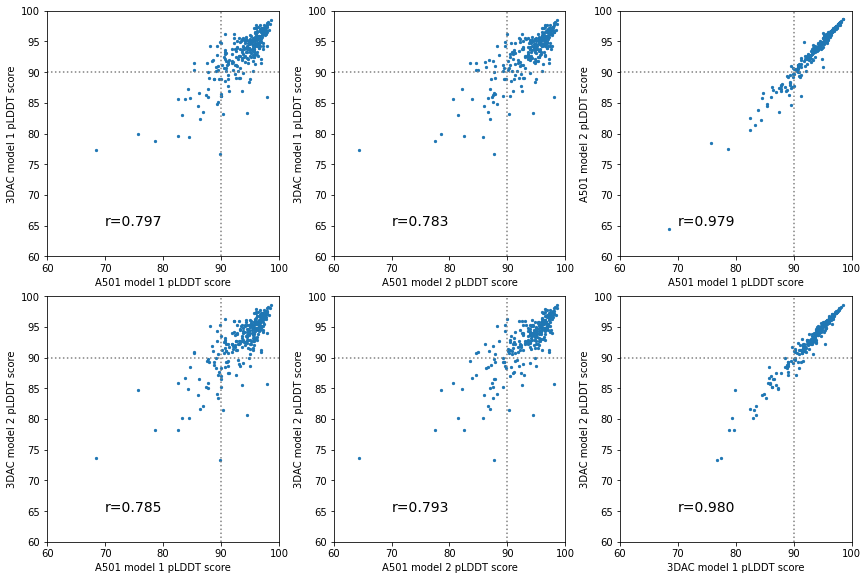

In [51]:
corrMat = avaiable_DF[["A501_structure_model_1_score","A501_structure_model_2_score","3DAC_structure_model_1_score","3DAC_structure_model_2_score"]].corr()

plt.figure(figsize=(12,8))

plt.subplot(231)
plt.scatter(avaiable_DF["A501_structure_model_1_score"],avaiable_DF["3DAC_structure_model_1_score"],s=5)
plt.axhline(90,color="grey",linestyle=":")
plt.axvline(90,color="grey",linestyle=":")
plt.xlabel("A501 model 1 pLDDT score")
plt.ylabel("3DAC model 1 pLDDT score")
plt.xlim(60,100)
plt.ylim(60,100)
plt.text(70,65,"r=%.3f"%corrMat["A501_structure_model_1_score"]["3DAC_structure_model_1_score"],fontsize=14)


plt.subplot(232)
plt.scatter(avaiable_DF["A501_structure_model_2_score"],avaiable_DF["3DAC_structure_model_1_score"],s=5)
plt.axhline(90,color="grey",linestyle=":")
plt.axvline(90,color="grey",linestyle=":")
plt.xlabel("A501 model 2 pLDDT score")
plt.ylabel("3DAC model 1 pLDDT score")
plt.xlim(60,100)
plt.ylim(60,100)
plt.text(70,65,"r=%.3f"%corrMat["A501_structure_model_2_score"]["3DAC_structure_model_1_score"],fontsize=14)


plt.subplot(233)
plt.scatter(avaiable_DF["A501_structure_model_1_score"],avaiable_DF["A501_structure_model_2_score"],s=5)
plt.axhline(90,color="grey",linestyle=":")
plt.axvline(90,color="grey",linestyle=":")
plt.xlabel("A501 model 1 pLDDT score")
plt.ylabel("A501 model 2 pLDDT score")
plt.xlim(60,100)
plt.ylim(60,100)
plt.text(70,65,"r=%.3f"%corrMat["A501_structure_model_1_score"]["A501_structure_model_2_score"],fontsize=14)


plt.subplot(234)
plt.scatter(avaiable_DF["A501_structure_model_1_score"],avaiable_DF["3DAC_structure_model_2_score"],s=5)
plt.axhline(90,color="grey",linestyle=":")
plt.axvline(90,color="grey",linestyle=":")
plt.xlabel("A501 model 1 pLDDT score")
plt.ylabel("3DAC model 2 pLDDT score")
plt.xlim(60,100)
plt.ylim(60,100)
plt.text(70,65,"r=%.3f"%corrMat["A501_structure_model_1_score"]["3DAC_structure_model_2_score"],fontsize=14)


plt.subplot(235)
plt.scatter(avaiable_DF["A501_structure_model_2_score"],avaiable_DF["3DAC_structure_model_2_score"],s=5)
plt.axhline(90,color="grey",linestyle=":")
plt.axvline(90,color="grey",linestyle=":")
plt.xlabel("A501 model 2 pLDDT score")
plt.ylabel("3DAC model 2 pLDDT score")
plt.xlim(60,100)
plt.ylim(60,100)
plt.text(70,65,"r=%.3f"%corrMat["A501_structure_model_2_score"]["3DAC_structure_model_2_score"],fontsize=14)

plt.subplot(236)
plt.scatter(avaiable_DF["3DAC_structure_model_1_score"],avaiable_DF["3DAC_structure_model_2_score"],s=5)
plt.axhline(90,color="grey",linestyle=":")
plt.axvline(90,color="grey",linestyle=":")
plt.xlabel("3DAC model 1 pLDDT score")
plt.ylabel("3DAC model 2 pLDDT score")
plt.xlim(60,100)
plt.ylim(60,100)
plt.text(70,65,"r=%.3f"%corrMat["3DAC_structure_model_1_score"]["3DAC_structure_model_2_score"],fontsize=14)

plt.tight_layout(pad=0.5)

plt.savefig("Figure/Fig2_score_2D_distribution.png",dpi=300)


In [7]:
avaiable_DF

,A501_sequence_id,A501_sequence_name,A501_sequence,A501_structure_status,3DAC_sequence_name,3DAC_sequence_id,3DAC_sequence,A501_structure_model_1_score,A501_structure_model_2_score,3DAC_structure_status,3DAC_structure_model_1_score,3DAC_structure_model_2_score
0,A501_001,WP_011250482.1,MAKKGAGATRGISPVRPTRALPIGAYLKVADNSGAKVIQIIGVVGY...,True,Chromosome1_1050,3DAC_210,MVRPYSRLKIADNSGVKEIQVIRVIGNLQDDALNPNVKIWGTVGDI...,90.681015,90.474789,True,92.911375,92.915551
1,A501_002,WP_042692804.1,MGKSLIQQRRGKGTTTFRAPSHRYRGAVKYVPLNVVKEKTLRGVVE...,True,Chromosome1_1057,3DAC_211,MGIKKFKPTTPGRRHMTVLDFSEITKTEPEKSLVVTKKSTGGRNNQ...,94.120890,93.913161,True,95.125738,95.403985
2,A501_003,WP_042693005.1,MKVVRFGVSVPEELLEKFDRIIEEKGYVNRSEAIRDLMRDFIIRHE...,True,Chromosome1_210,3DAC_024,MRFTVSVDDEIGAFIDSLVKEYGYASRSELIRDLAREKKAELEVGD...,95.654313,95.708373,True,93.529059,93.964420
3,A501_004,WP_050001839.1,MDCTKDYCVKDLSLATSGEKKIDWVSRFMPVLQTIRREFEREKPFK...,True,Chromosome1_1121,3DAC_224,MAHVKDISLAPHGWKKINWVKAHMKVMPLVKKRLDEKGIFKGVRIG...,96.819289,96.925328,True,96.596944,96.796390
4,A501_005,WP_050001842.1,MRRDYTLYLFASLGSFLIAYIALPLVIIFAKQLMDWEMLVKTLHDP...,True,Chromosome1_359,3DAC_056,MLRFFATLLAFIILLPFLGLSIYTTPSELWHALTNPDVLDALKNSF...,95.500632,95.463742,True,93.608329,93.864206
...,...,...,...,...,...,...,...,...,...,...,...,...
298,A501_299,WP_050003989.1,MELLKLNVVPCRFIERLNRFVALVEVGGDVRKALVTNTGRLEEFMI...,True,Chromosome1_1280,3DAC_263,MIKLNADIGKNHTQGTFIKRINRFVAEVEVNGKRYHAHLHDSGRLG...,96.534032,96.902222,True,93.991998,95.005335
299,A501_300,WP_081947179.1,MQVYEGKAKKVIPLDDGKAIMEFKDDATAFNGEKKAQFRGKGWLNA...,True,Chromosome1_715,3DAC_131,MVYEGKTKIVEIKDGYAYLHFKDDITAGDGEKHDVMSGKGSMCAEI...,96.261229,96.562634,True,96.553615,96.750627
300,A501_301,WP_081947215.1,MLYPALAVVDPGLPRRTPELIDWESLSVITALIMASKGLELSGIFS...,True,Chromosome1_85,3DAC_013,MVKIKNWFKNNWLLVVSVTVAIVLYAFDRGPLHRYIGYHDAKVLLV...,92.334227,92.401615,True,91.155114,92.056957
301,A501_302,WP_081947255.1,MGQQAGLREDKTRREGRGVAVRLRTPLSTEDVLRLEVGDVVYLSGE...,True,Chromosome1_624,3DAC_108,MFDAQAGSRMLYTGYLYTMRDGTLKRLINDSFQFTDIFPVYFCGPS...,90.763258,89.957586,True,96.225301,96.358389
